**Introduction**:
Ce projet vise à explorer les relations entre les différents composants du jeu de données(dataset) dans le but de développer un modèle de machine learning capable de prédire si une personne est **diabétique** ou non. Le jeu de données contient divers attributs, et l'analyse de ces relations nous aidera à comprendre les facteurs influençant le diabète. L'objectif est d'utiliser ces connaissances pour construire un modèle prédictif efficace.
Vous pouvez télécharger l'ensemble de données sur cette [page](https://www.kaggle.com/datasets/muhammadehsan000/diabetes-healthcare-dataset)


In [1]:
# Importation des librairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats


In [2]:
# Importation des données
sheet=pd.read_csv(r"C:\Users\nessm\OneDrive\Bureau\data\archive\Diabetes-Data.csv")

In [3]:
#Mettre le fichier dans un DataFrame
df=pd.DataFrame(sheet)


In [4]:
#Afficher les 5 premieres lignes
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
#Supprimer les lignes où la colonne Outcome est vide
df=df.dropna(subset=['Outcome'])

Text(0.5, 1.0, 'Répartition des résultats de diabète')

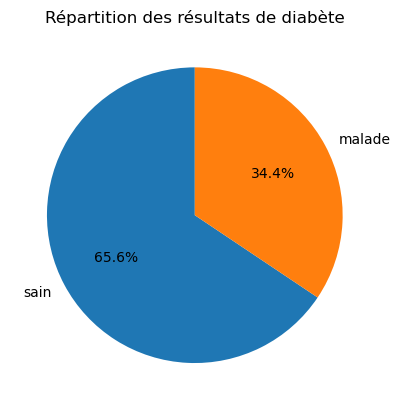

In [7]:
change = {0: 'sain', 1: 'malade'}
df['Outcome'] = df['Outcome'].map(change)
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')  
plt.title("Répartition des résultats de diabète")




Ces données enregistre 34,4 % de personnes diabétiques et 65,6 % de personnes saines

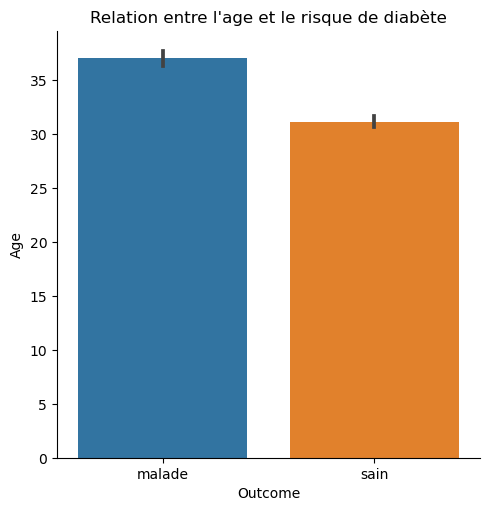

In [8]:
sns.catplot(x = "Outcome", y = "Age", kind = "bar", data = df)
plt.title("Relation entre l'age et le risque de diabète")
plt.show()

Nous constatons que les personnes âgées **ont un risque plus élevé** d'être diabétiques.

In [9]:
# Calculer la corrélation de Pearson et la valeur p entre l'âge et le taux d'insuline
correlation,p_value=stats.pearsonr(df['Age'],df['Insulin'])
print("correlation=",correlation)
print("p_value=",p_value)

correlation= -0.07345779277607487
p_value= 0.00010962972305928927


**Corrélation** : La valeur de **-0.073** indique une **très faible corrélation négative** entre l'âge et le taux d'insuline.
**Valeur p** : Une valeur p de **0.00011**, **bien inférieure à 0.05**, indique que la relation observée est **statistiquement significative**. Cependant, la faible valeur de la corrélation suggère que, même si la relation est significative sur le plan statistique, elle est de faible importance en pratique.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogramme  nombre de grossesses et l'issue du diabète")

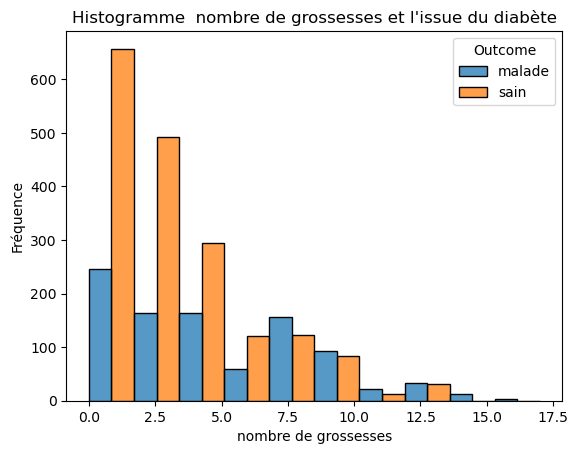

In [10]:
sns.histplot(data=df, x='Pregnancies', hue='Outcome', multiple='dodge', bins=10)
plt.xlabel('nombre de grossesses')
plt.ylabel('Fréquence')
plt.title("Histogramme  nombre de grossesses et l'issue du diabète")

Nous remarquons que lorsque le nombre de grossesses **atteint 7 ou plus**, le risque de diabète chez la femme **augmente** de manière significative.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


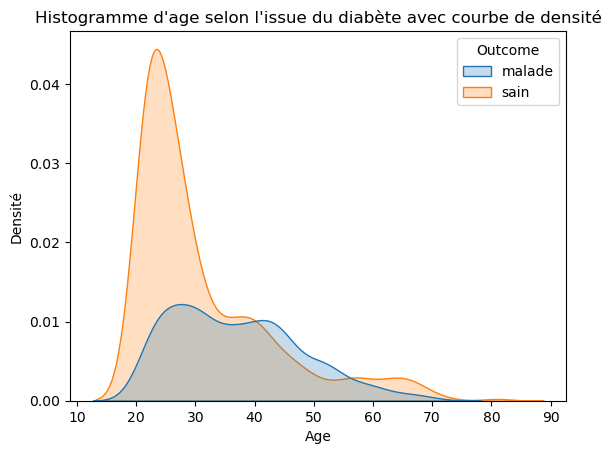

In [11]:
sns.kdeplot(data=df, x='Age', hue='Outcome', fill=True);
plt.ylabel('Densité')
plt.title("Histogramme d\'age selon l'issue du diabète avec courbe de densité")
plt.show()

*La densité la plus élevée des personnes malades  se situe autour de 25 à 30 ans.Il y a une densité notable se situe autour de 45 à 60 ans,cela indique que le diabète est plus fréquent chez les personnes dans cette tranche d'âge.
La distribution des âges pour les personnes sans diabète est **plus concentrée dans les tranches d'âge jeunes**, avec un pic autour de 25 à 35 ans.
**La densité diminue progressivement avec l'âge**, montrant qu'il y a moins de personnes saines parmi les plus âgés.
Les personnes malades (bleu) ont une densité plus élevée dans les tranches d'âge plus avancées (40-60 ans), **ce qui suggère que le diabète devient plus fréquent avec l'âge.**
**Le risque de diabète augmente avec l'âge, surtout après 40 ans**, comme le montre la courbe bleue qui devient dominante dans cette tranche d'âge.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogramme de l'IMC en fonction de l'issue du diabète")

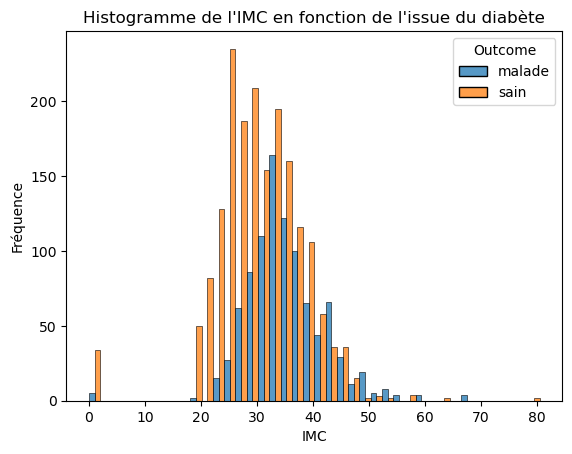

In [12]:
sns.histplot(data=df, x='BMI', hue='Outcome', multiple='dodge', bins=40)
plt.xlabel('IMC')
plt.ylabel('Fréquence')
plt.title("Histogramme de l\'IMC en fonction de l\'issue du diabète")

 Lorsque la masse corporelle atteint 42 kg/m² ou plus,**le risque augmente**.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Histogramme du taux d'insuline selon l'issue du diabète avec courbe de densité")

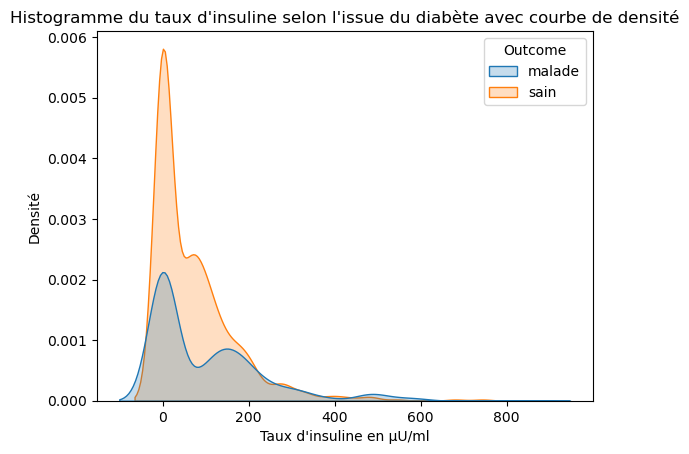

In [13]:
sns.kdeplot(data=df, x='Insulin', hue='Outcome', fill=True)
plt.ylabel('Densité')
plt.xlabel('Taux d\'insuline en µU/ml')
plt.title("Histogramme du taux d'insuline selon l'issue du diabète avec courbe de densité")

La courbe de densité montre que la majorité des individus malades (en bleu) ont des taux d'insuline concentrés autour de valeurs très basses, principalement en dessous de 200 µU/ml. En revanche, les personnes saines peuvent avoir des taux d'insuline allant jusqu'à 600 µU/ml.

Text(0, 0.5, 'Fonction de Parenté du Diabète')

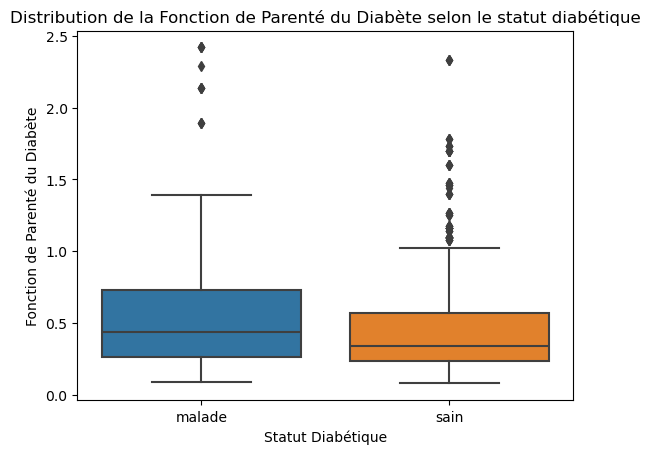

In [14]:
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Distribution de la Fonction de Parenté du Diabète selon le statut diabétique')
plt.xlabel('Statut Diabétique')
plt.ylabel('Fonction de Parenté du Diabète')

Chez les personnes diabétiques, **le taux de la Fonction de Parenté du Diabète est généralement plus élevé que chez les personnes saines**. La valeur maximale peut atteindre près de 1,5, tandis que chez les personnes saines, la valeur maximale est de 1. Cependant, il est à noter que certaines personnes saines peuvent avoir un taux allant jusqu'à 1,7

In [15]:
correlation,p_value=stats.pearsonr(df['BloodPressure'], df['Insulin'])
print("correlation=",correlation)
print("p_value=",p_value)

correlation= 0.0878225181194817
p_value= 3.7036466512408584e-06


Dans cet échantillon , La valeur de la statistique de corrélation est très proche de zéro, ce qui indique **une corrélation très faible** entre la pression artérielle et l'insuline. La valeur p est **très inférieure à 0,05**, ce qui signifie que la corrélation observée est **statistiquement significative.**

Text(0.5, 0, 'Statut Diabétique')

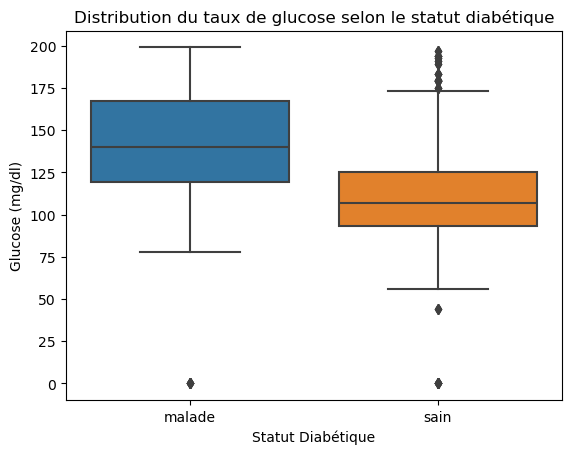

In [16]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Distribution du taux de glucose selon le statut diabétique')
plt.ylabel('Glucose (mg/dl)')
plt.xlabel('Statut Diabétique')


 **Pour les personnes diabétiques** : la concentration maximale du glucose est égale à 200 mg/dl et la concentration minimale est égale à 75 mg/dl. Moins de 50 % des personnes ont une concentration égale à 135 mg/dl après avoir effectué un test de tolérance au glucose oral de 2 heures.

**Pour les personnes saines** : la concentration maximale du glucose est égale à 175 mg/dl et la concentration minimale est égale à 55 mg/dl. Moins de 50 % des personnes ont une concentration égale à 105 mg/dl après avoir effectué un test de tolérance au glucose oral de 2 heures.

 **Conclusion** : Les personnes **plus âgées**, les femmes ayant un **nombre élevé de grossesses**, celles avec un **IMC plus élevé**, ainsi que celles présentant un **taux élevé de Fonction de Parenté du Diabète**, ont tendance à avoir des **niveaux d'insuline plus faibles.**

Construire un modèle **RandomForest**

In [17]:
# Importation des librairies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [18]:
#Choisir  des colonnes spécifiques
columns_to_remove = ['Id', 'SkinThickness', 'Outcome']
X = df.drop(columns_to_remove,axis=1)
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
2763,2,75,64,55,29.7,0.370,33
2764,8,179,72,130,32.7,0.719,36
2765,6,85,78,0,31.2,0.382,42
2766,0,129,110,130,67.1,0.319,26


In [19]:
Y=df.Outcome
Y

0       malade
1         sain
2       malade
3         sain
4       malade
         ...  
2763      sain
2764    malade
2765      sain
2766    malade
2767      sain
Name: Outcome, Length: 2768, dtype: object

In [32]:
## Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
X_train.shape, Y_train.shape

((2214, 7), (2214,))

In [34]:
X_test.shape, Y_test.shape

((554, 7), (554,))

In [35]:
# Créer une instance du modèle
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [36]:
# Créer une instance du scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Transformer les données de test
X_test_scaled = scaler.transform(X_test)

In [37]:
## Entraîner le modèle
model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Faire des prédictions
Y_pred = model.predict(X_test_scaled)

In [39]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9945848375451264
Confusion Matrix:
 [[192   3]
 [  0 359]]


**La matrice de confusion**  est un outil essentiel pour évaluer la performance d'un modèle de **classification**. Elle compare les valeurs prédites par le modèle avec les valeurs réelles.
**Colonne 0, Ligne 0** : Représente le nombre de fois où le modèle a prédit 0 alors que le résultat réel était également 0 .
**Colonne 1, Ligne 0** : Représente le nombre de fois où le modèle a prédit 1 alors que le résultat réel était 0
**Colonne 0, Ligne 1** : Indique le nombre de fois où le modèle a prédit 0 alors que le résultat réel était 1 
**Colonne 1, Ligne 1** : Indique le nombre de fois où le modèle a prédit 1 alors que le résultat réel était également 1 

**La précision (accuracy)** est une mesure de la performance globale d'un modèle de classification. Elle indique la proportion de prédictions **correctes** effectuées par le modèle par rapport au nombre total de prédictions.

Création d'un autre modèle en utilisant **LogisticRegression**

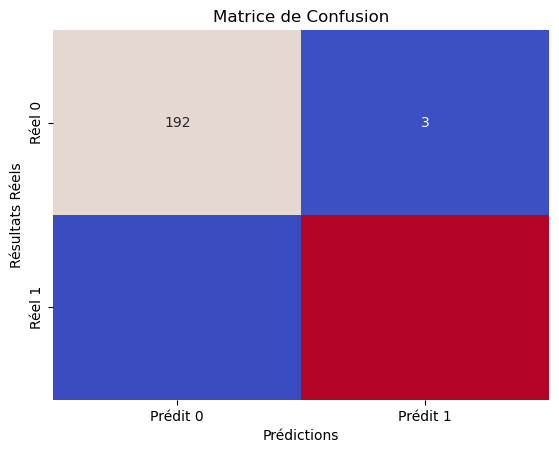

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisation de la matrice de confusion sous forme de heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, xticklabels=['Prédit 0', 'Prédit 1'], yticklabels=['Réel 0', 'Réel 1'])
plt.xlabel('Prédictions')
plt.ylabel('Résultats Réels')
plt.title('Matrice de Confusion')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.2)

X1_train_scaled = scaler.fit_transform(X1_train)

X1_test_scaled = scaler.transform(X1_test)

model.fit(X1_train_scaled, Y1_train)

Y1_pred = model.predict(X1_test_scaled)

accuracy1 = accuracy_score(Y1_test, Y1_pred)
print("Accuracy:", accuracy1)

cm1 = confusion_matrix(Y1_test, Y1_pred)
print("Confusion Matrix:\n", cm1)

Accuracy: 0.8068592057761733
Confusion Matrix:
 [[125  74]
 [ 33 322]]


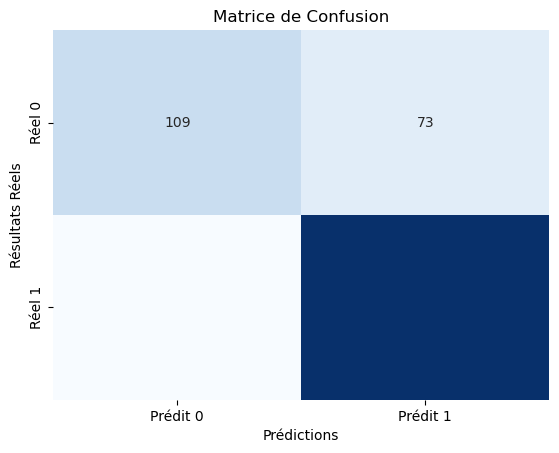

In [30]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Prédit 0', 'Prédit 1'], yticklabels=['Réel 0', 'Réel 1'])
plt.xlabel('Prédictions')
plt.ylabel('Résultats Réels')
plt.title('Matrice de Confusion')
plt.show()

Le modèle LogisticRegression génère un nombre de prédictions négatives **plus élevé que le modèle RandomForest**